# Data science project

Saadan teile failid .zip kujul. CSV failides on kaks andmetabelit, mis koosnevad sünteetilitest andmetest, mis põhinevad reaalsete vähihaigete (kopsu ja eesnäärme) haigustrajektooridel. Andmetabelitel on kolm tunnust SUBJECT_ID - unikaalne patsiendi id; DEFINITION_ID - meditsiiniline sekkumine, mis patsiendiga toimus; TIME - aeg aastates, millal sekkumine toimus. Ajal 0 sai iga patsient vähidiagnoosi. Osadel patsientidest on olemas seisund "death", mis tähendab, et see patsient suri antud ajahetkel. Kõikide patsientide puhul on kustutatud aasta enne suremist/viimast üleskirjutist.

Teie ülesanne on ennustada patsientide suremust 1-aasta käigus (mil andmed lõppevad), ehk siis klassifitseerimisülesanne, kus klass 1 - patsient sureb; 0 - patsient jääb aasta jooksul ellu. Üks viis andmeid töödelda, selleks, et neid mudelitele ette sööta, on iga unikaalne sekkumine ja selle järjekorra number muuta eraldi tunnuseks, tekitada iga patsiendi kohta üks rida ja väärtuseks võtta aeg. Kuid igasugune andmete töötlemine on teie enda vaba valik. Te võite tekitada klassifitseerija ükskõik millisel meetodil: otsustuspuud, närvivõrgud, logistiline regressioon vms. 

Üks peamine probleem terviseandmetega on tõsisasi, et need on üsna mürased. Erinevate sekkumiste all on peidetud definitsioonid, millest osad on arvatavasti ennustamiseks olulised (näiteks "keemiaravi") ja teised mitte nii väga (näiteks "nägemiskontroll"). Müraste andmete/tunnuste eemaldamine võib antud ülesande puhul suuresti tõsta mudeli täpsust. Käesoleva ülesande juures on tähtis, et te ei või eeldada, et sekkumiste definitsioonid on erinevate andmetabelite seas sama tähendusega (antud juhul näiteks, et Drug_1 on sama, mis Drug_1 teises andmestikus).

Töö tulemuseks peaks olema töövoog, mis võtab samasuguse andmetabeli sisendiks ning väljastaks AUC-ROC väärtuse ja mudeli enda. Seda võib teha nii jupyter-notebookis kui ka skripti kujul.

ZIP failist leiate kaks andmetabelit, võite üht kasutada töövoo loomiseks ja teist selleks, et seda valideerida. Andmed on sünteetilised ja pole üksteisega seotud (SUBJECT_ID väärtus 1 ühes ei tähenda, et tegu on sama inimesega teises andmetabelis). Mul endal on ligipääs päris andmetele, mida ma teiega kahjuks jagada ei saa, aga ma võin jooksutada teie töövoogu päris andmetel ja jagada teiega tulemusi. Te võite väljundisse lisada erinevat statistikat, mida soovite pärisandmetelt saada. Need väljundid peavad olema summeeritud, mis tähendab, et ma ei saa teiega jagada patsiendi tasemel andmeid.

Ma ise loodan, et teie loodud töövoog selekteeriks tunnuseid. Parim terviseandmete mudel on võimalikult väikese arvu tunnustega, samuti teades neid tunnuseid saab edendada teadustööd nii haiguste kui ka nende ärahoidmise/ravimise kohta. Samuti soovitan julgelt proovida graafi loomist ning sellelt "key-playerite" jms leidmist, see oleks innovaatiline viis tunnuste valimiseks.

FYI, neid samu andmeid kasutades sain ma juhumetsaga AUCROC'i 0.65 ja pärast tunnuste selekteerimist oli AUCROC 0.75. Juhul kui töö tulemus on hea ja kasutatav ka muude haiguste ennustusmudelite loomisel on võimalus saada oma nimi teadusartiklile 🙂 

 Hello!

I was contacted regarding the concern about death times occurring later than a year from last medical intervention. The problem is present because of my coding error 🙂 This is okay and does not mess up the overall purpose of your workflow. You can consider all persons who have the "death"  state as dying within one year.

Sorry about the confusion,

# Lung Cancer Survival Prediction with Synthetic Data

Objective:
Utilize synthetic medical data to predict 5-year survival rates post-lung cancer diagnosis by effectively selecting key features from patient treatment trajectories.
Possible approach:
1. Feature Selection: Use algorithms like PCA and Stepwise Selection to identify crucial features.
2. Subsequence Analysis: Find frequent subsequences within treatment trajectories for additional predictive value. Effectiveness (performance) of the algorithm is important.
3. Use network science approach. Using graphs and extracting key-player nodes as features and using them for prediction.
4. Any custom approach.
End result:
Predictive Model: Develop a workflow that, given patient treatment trajectory data, outputs a 5-year survival prediction. Workflow will be tested on a test set not seen by students and compared with other groups work.
Outcome:
A concise list of significant features, an understanding of vital treatment subsequences, and a prediction function for stakeholder use. Possibility to get published!

In [1]:
# Reading the files
import pandas as pd

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

data=pd.read_csv("synthetic_data_lung_cancer.csv")
validation=pd.read_csv("synthetic_data_pca.csv")

data,validation

(        SUBJECT_ID     DEFINITION_ID      TIME
 0                1          drug_217  0.004807
 1                1    condition_1922  0.008643
 2                1     condition_785  0.027792
 3                1           drug_49  0.032515
 4                1   measurement_132  0.056765
 ...            ...               ...       ...
 560966         984  measurement_1141  0.027321
 560967         984   observation_156  0.028739
 560968         984  measurement_1140  0.030802
 560969         984  measurement_1327  0.035081
 560970         984     condition_459  0.038022
 
 [560971 rows x 3 columns],
         SUBJECT_ID     DEFINITION_ID      TIME
 0                1     condition_141  0.019808
 1                1     condition_144  0.068319
 2                1          drug_108  0.069314
 3                1     condition_621  0.093951
 4                1          drug_283  0.133907
 ...            ...               ...       ...
 542732         777   measurement_441  4.168139
 542733   

In [6]:
def prepare_features_and_labels(df):
    """
    Prepares the features and labels for model training from the dataset.
    
    Args:
    - df: A pandas DataFrame containing the data with 'SUBJECT_ID', 'DEFINITION_ID', and 'TIME' columns.
    
    Returns:
    - X: Features DataFrame ready for training.
    - y: Labels Series indicating whether death occurred within a year.
    """
    # Step 1: Extract general categories from DEFINITION_ID
    df['category'] = df['DEFINITION_ID'].str.extract(r'(\D+)')

    # Step 2: Count occurrences of each category per patient
    category_counts = df.pivot_table(index='SUBJECT_ID', columns='category', aggfunc='size', fill_value=0)

    # Step 3: Calculate time-based features
    df['time_of_first_intervention'] = df.groupby('SUBJECT_ID')['TIME'].transform('min')
    df['time_since_last_intervention'] = df.groupby('SUBJECT_ID')['TIME'].transform('max')
    df['duration_of_treatment'] = df['time_since_last_intervention'] - df['time_of_first_intervention']
    df['average_time_between_interventions'] = df.groupby('SUBJECT_ID')['TIME'].transform(lambda x: x.diff().mean() if len(x) > 1 else 0)

    # Aggregate these features into a single dataframe, ensuring one row per patient
    time_features = df.groupby('SUBJECT_ID')[['time_of_first_intervention', 'time_since_last_intervention', 
                                              'duration_of_treatment', 'average_time_between_interventions']].first().reset_index()

    # Combine counts of categories with time-based features
    features_data = pd.merge(category_counts, time_features, on='SUBJECT_ID')

    # Step 4: Identify 'death' events and create the binary target variable
    death_events = df[df['DEFINITION_ID'] == 'death']['SUBJECT_ID'].unique()
    features_data['death'] = features_data['SUBJECT_ID'].isin(death_events).astype(int)

    # Drop 'SUBJECT_ID' as it is not a feature
    features_data.drop('SUBJECT_ID', axis=1, inplace=True)

    # Split the combined data into features and labels
    X = features_data.drop('death', axis=1)
    y = features_data['death']
    
    return X, y

# Example usage:
# X_train, y_train = prepare_features_and_labels(training_data)
# X_validation, y_validation = prepare_features_and_labels(validation_data)


In [ ]:
X

In [7]:
X, y = prepare_features_and_labels(data)
X_validation, y_validation = prepare_features_and_labels(validation)

# Define the parameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],    # Minimum number of samples required to be at a leaf node
    # Add other parameters here if you want
}

# Initialize the RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV with the classifier, parameter grid, and desired scoring metric
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, 
                           cv=5, n_jobs=-1, scoring='roc_auc', verbose=2)

# Fit GridSearchCV to the training data
grid_search.fit(X, y)



Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='roc_auc', verbose=2)

In [9]:
# Get the best estimator
best_rf_classifier = grid_search.best_estimator_

# Optionally, evaluate on the validation set
X_validation = X_validation.reindex(columns=X.columns, fill_value=0)  # Ensuring column match
y_pred_proba_validation = best_rf_classifier.predict_proba(X_validation)[:, 1]
auc_roc_validation = roc_auc_score(y_validation, y_pred_proba_validation)

print("Best Parameters:", grid_search.best_params_)
print("Best AUC-ROC on Validation:", auc_roc_validation)


Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
Best AUC-ROC on Validation: 0.8835988367604292


In [16]:
X, y = prepare_features_and_labels(data)
X_validation, y_validation = prepare_features_and_labels(validation)

rf_classifier = RandomForestClassifier(random_state=42, max_depth= 10, min_samples_leaf= 1, min_samples_split = 10, n_estimators= 300)
rf_classifier.fit(X,y)

# Ensure that the columns in the validation set match the training set
X_validation = X_validation.reindex(columns=X.columns, fill_value=0)

# Predict the probabilities on the validation set
y_pred_proba_validation = rf_classifier.predict_proba(X_validation)[:, 1]

# Calculate the AUC-ROC score on the validation set
auc_roc_validation = roc_auc_score(y_validation, y_pred_proba_validation)

auc_roc_validation


0.8871245850168566

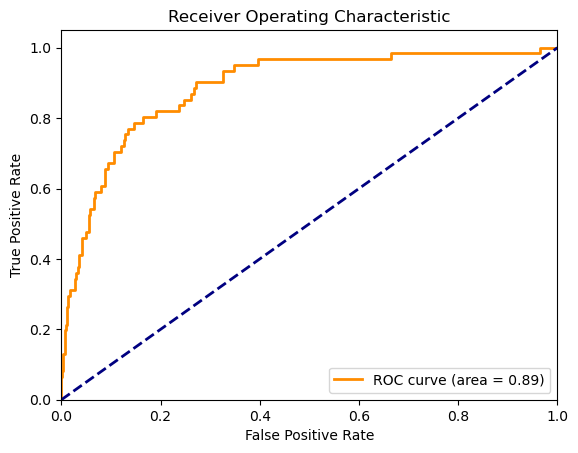

In [18]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Assuming y_validation and y_pred_proba_validation are already defined as shown in your code

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_validation, y_pred_proba_validation)

# Calculate the AUC
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


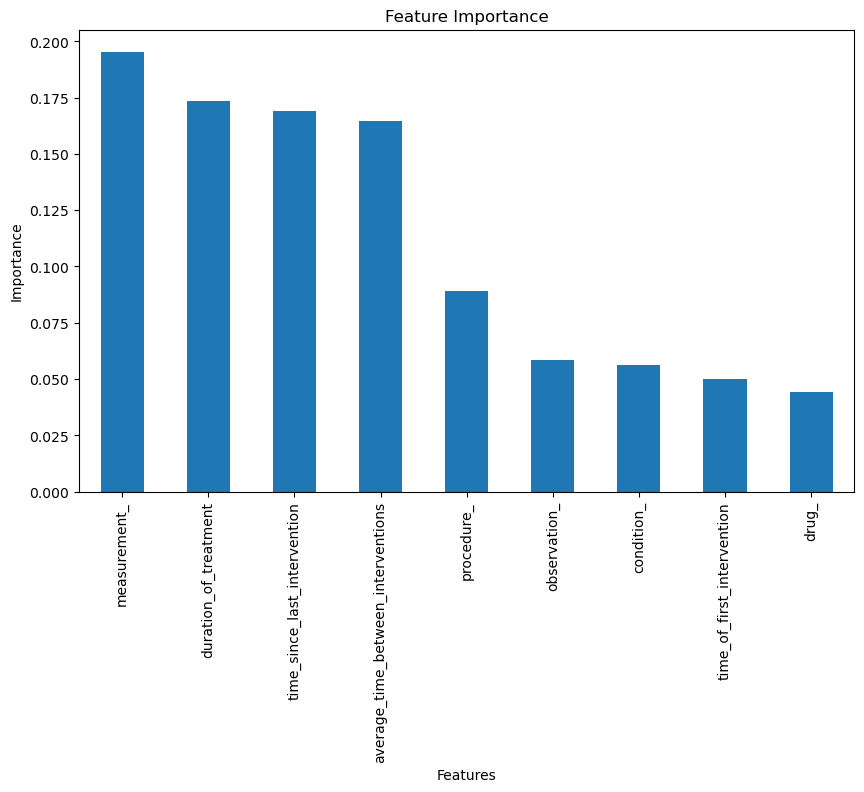

In [20]:
# Extract feature importances from the trained RandomForest model
feature_importances = rf_classifier.feature_importances_

# Create a series with feature names and their importance scores
importances = pd.Series(feature_importances, index=X.columns)

# Sort the feature importances in descending order
sorted_importances = importances.sort_values(ascending=False)

# Plotting
plt.figure(figsize=(10,6))
sorted_importances.plot(kind='bar')
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

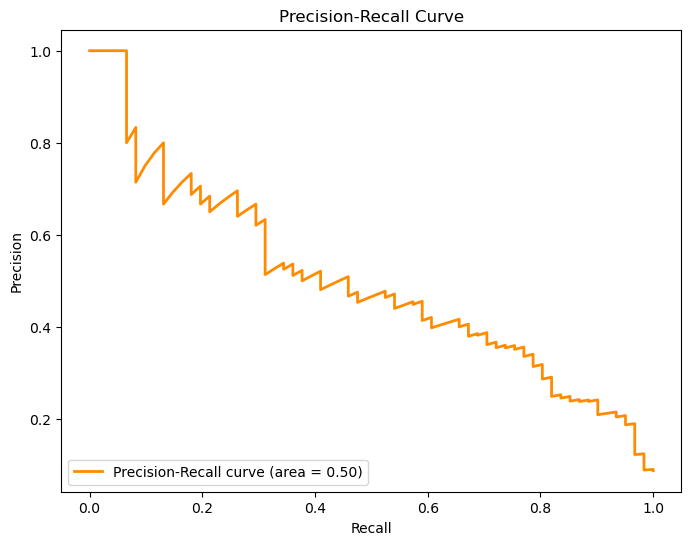

In [22]:
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt

# Compute precision and recall values
precision, recall, _ = precision_recall_curve(y_validation, y_pred_proba_validation)

# Compute the area under the precision-recall curve
auc_score = auc(recall, precision)

# Plotting the Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='darkorange', lw=2, label='Precision-Recall curve (area = %0.2f)' % auc_score)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()


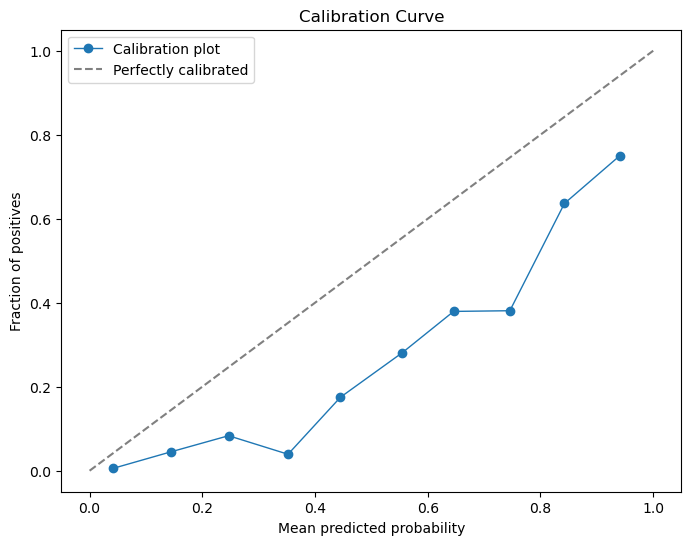

In [23]:
from sklearn.calibration import calibration_curve
import matplotlib.pyplot as plt

# Compute the calibration curve
prob_true, prob_pred = calibration_curve(y_validation, y_pred_proba_validation, n_bins=10, strategy='uniform')

# Plotting the Calibration curve
plt.figure(figsize=(8, 6))
plt.plot(prob_pred, prob_true, marker='o', linewidth=1, label='Calibration plot')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Perfectly calibrated')
plt.xlabel('Mean predicted probability')
plt.ylabel('Fraction of positives')
plt.title('Calibration Curve')
plt.legend()
plt.show()


# edasised cellid vanad

In [11]:
# Sample a subset of the data to create a smaller graph for analysis

# We will take a random sample of patients and their corresponding interventions


# Since the data may be ordered by SUBJECT_ID, we shuffle the data to get a random sample

data_sample = features.sample(frac=1, random_state=1)

data_sample.reset_index(drop=True, inplace=True)


# Let's take a sample of 5% of the data to make the graph computation tractable

sample_size = int(0.5 * len(data_sample))

data_sample = data_sample.head(sample_size)



# Create a new graph from the sampled data

G_sample = nx.Graph()



# Add nodes and edges from the sampled dataset

for index, row in data_sample.iterrows():

    # Add node if it doesn't exist

    if not G_sample.has_node(row['DEFINITION_ID']):

        G_sample.add_node(row['DEFINITION_ID'])

    

    # Since the data is ordered by time for each SUBJECT_ID, we can link sequential interventions

    if index > 0 and data_sample.iloc[index - 1]['SUBJECT_ID'] == row['SUBJECT_ID']:

        prev_definition_id = data_sample.iloc[index - 1]['DEFINITION_ID']

        # If edge does not exist, add with weight 1, otherwise increase weight

        if not G_sample.has_edge(prev_definition_id, row['DEFINITION_ID']):

            G_sample.add_edge(prev_definition_id, row['DEFINITION_ID'], weight=1)

        else:

            G_sample[prev_definition_id][row['DEFINITION_ID']]['weight'] += 1


# Calculate centrality measures on the sample graph again

degree_centrality_sample = nx.degree_centrality(G_sample)

betweenness_centrality_sample = nx.betweenness_centrality(G_sample)

closeness_centrality_sample = nx.closeness_centrality(G_sample)




NameError: name 'features' is not defined

In [ ]:
# Identify key players using degree centrality from the full graph
key_players_by_degree_full = sorted(degree_centrality_sample.items(), key=lambda item: item[1], reverse=True)

# Retrieve the top 100 key players from the full dataset
top_key_players_full = key_players_by_degree_full[:300]

top_key_players_full

In [ ]:
# We will now split the data with the corrected labels
X_train, X_test, y_train, y_test = train_test_split(
    key_features_data_scaled, pivot_data_label, test_size=0.2, random_state=42, stratify=pivot_data_label)

# Train the logistic regression model using the corrected data
logreg = LogisticRegression(max_iter=10000)
logreg.fit(X_train, y_train)

# Predict probabilities for the test set
y_pred_proba = logreg.predict_proba(X_test)[:, 1]

# Calculate the AUC-ROC score for the test set
auc_roc = roc_auc_score(y_test, y_pred_proba)

auc_roc


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data only
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Initialize the Random Forest Classifier
rf_smote = RandomForestClassifier(random_state=42)

# Train the Random Forest Classifier on the SMOTE-resampled training data
rf_smote.fit(X_train_smote, y_train_smote)

# Predict probabilities for the test set
y_pred_proba_rf_smote = rf_smote.predict_proba(X_test)[:, 1]

# Calculate the AUC-ROC score for the test set using the Random Forest model trained on SMOTE data
auc_roc_rf_smote = roc_auc_score(y_test, y_pred_proba_rf_smote)

# Output the SMOTE class distribution and the AUC-ROC score
smote_class_distribution = pd.Series(y_train_smote).value_counts(), auc_roc_rf_smote

auc_roc_rf_smote

In [ ]:
#old code

# Correcting the approach to create the target label 'death'

# Recreate the pivot table for the development dataset
pivot_data = data.pivot_table(index='SUBJECT_ID', columns='DEFINITION_ID', values='TIME', aggfunc='first')

# Correctly identify the 'death' entries within the 'DEFINITION_ID' column and assign the binary label
# '1' for death within a year and '0' for survival
death_events = data[data['DEFINITION_ID'] == 'death']['SUBJECT_ID'].unique()
pivot_data['death'] = pivot_data.index.isin(death_events).astype(int)

# Drop the 'death' column from features
pivot_data_features = pivot_data.drop('death', axis=1)
pivot_data_label = pivot_data['death']

# Display the first few rows of the features and the distribution of the label
pivot_data_features_head = pivot_data_features.head()
pivot_data_label_distribution = pivot_data_label.value_counts()

pivot_data_features_head, pivot_data_label_distribution
